# 개요

Random Forest를 사용하여 warm_start방식으로 재학습에 걸리는 시간과 성능을 체크한다.

* 특징정보 : api
* 수집한 apk : 2014~2020

In [1]:
from tqdm import tqdm
import numpy as np
import os
import pandas as pd
from itertools import product
import time
import warnings
import joblib
import shutil


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings(action='ignore')

# 전처리

In [3]:
train_X_dict, train_y_dict, test_X_dict, test_y_dict = dict(),dict(),dict(),dict()
for i, year in enumerate(range(2014,2021)):
    df1 = pd.read_csv(f'./csv_5000/csv_5000/{year}_benign_api.csv', index_col=0)
    df2 = pd.read_csv(f'./csv_5000/csv_5000/{year}_malware_api.csv', index_col=0)
    df1['year']=year
    df1['b/m']=0
    df2['year']=year
    df2['b/m']=1
    
    train_X_dict[year] = pd.concat([df1.iloc[1000:,:-2],df2.iloc[1000:,:-2]])
    train_y_dict[year] = pd.concat([df1.iloc[1000:,-2:],df2.iloc[1000:,-2:]])
    test_X_dict[year] = pd.concat([df1.iloc[:1000,:-2],df2.iloc[:1000,:-2]])
    test_y_dict[year] = pd.concat([df1.iloc[:1000,-2:],df2.iloc[:1000,-2:]])

In [4]:
def make_model(model, df_x, df_y):
    model.n_estimators+=100
    start = time.time()
    model.fit(df_x, df_y)
    end = time.time()
    return model, (end-start)*1000

In [5]:
def convert_size(size_bytes):
    import math
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

In [6]:
def AUT(list_):
    return sum([(list_[i] + list_[i+1])/2 for i, elm in enumerate(list_[:-1])])/(len(list_)-1) 

# Sustainability 실험

In [7]:
time_list=[]
size_list=[]
score_dict = dict()
f1_dict = dict()

In [8]:
dir_path = './ex2_model'

if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

if not os.path.isdir(dir_path):
    os.mkdir(dir_path)

In [9]:
model13 = RandomForestClassifier(random_state=42, warm_start=True , n_estimators=0)
joblib.dump(model13, './ex2_model/model13.pkl')

['./ex2_model/model13.pkl']

## 14 년도

In [10]:
year=14

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2656.193256378174
7.86 MB


In [11]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 15 년도

In [12]:
year=15

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2870.215892791748
16.29 MB


In [13]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 16년도

In [14]:
year=16

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2936.114549636841
22.92 MB


In [15]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 17년도

In [16]:
year=17

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2249.7613430023193
27.52 MB


In [17]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 18년도

In [18]:
year=18

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

4301.076650619507
31.94 MB


In [19]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 19년도

In [20]:
year=19

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2255.0652027130127
35.27 MB


In [21]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

## 20년도

In [22]:
year=20

df = train_X_dict[year+2000]
label = train_y_dict[year+2000]['b/m']

exec(f"model{year} = joblib.load('./ex2_model/model{year-1}.pkl')")
exec(f'model{year}, train_time = make_model(model{year}, df, label)')
exec(f'time_list.append((20{year}, train_time))')

exec(f"joblib.dump(model{year}, './ex2_model/model{year}.pkl')")
exec(f"f_size = convert_size(os.path.getsize('./ex2_model/model{year}.pkl'))")
exec(f'size_list.append((20{year}, f_size))')

print(train_time) 
print(f_size)

2078.777551651001
38.39 MB


In [23]:
score_list=[eval(f'model{year}').score(test_X_dict[i], test_y_dict[i]['b/m']) for i in range(2014,2021)]
f1_list = [f1_score(test_y_dict[i]['b/m'], eval(f'model{year}').predict(test_X_dict[i])) for i in range(2014,2021)]
score_dict[year+2000] = score_list
f1_dict[year+2000] = f1_list

# 결과

In [24]:
if not os.path.isdir('./visual2'):
    os.mkdir('./visual2')

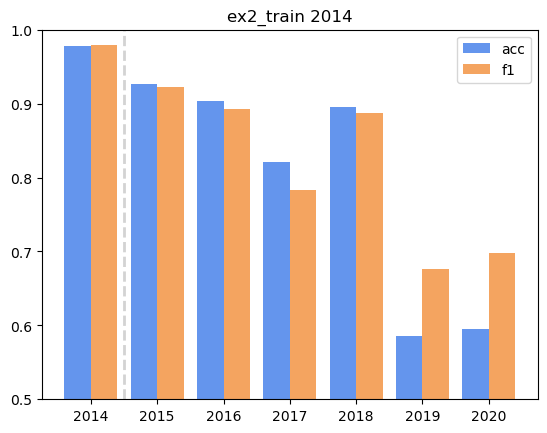

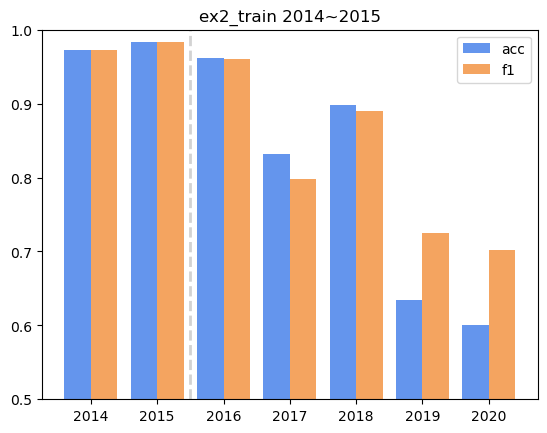

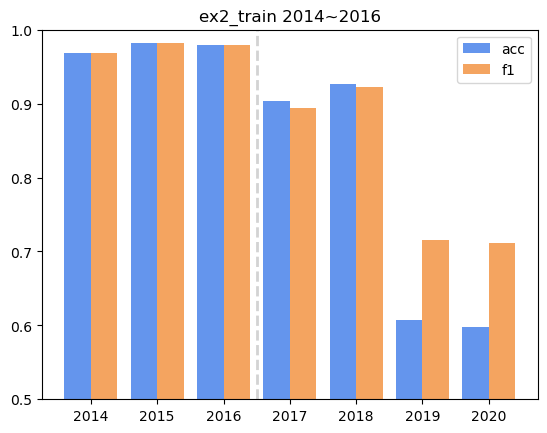

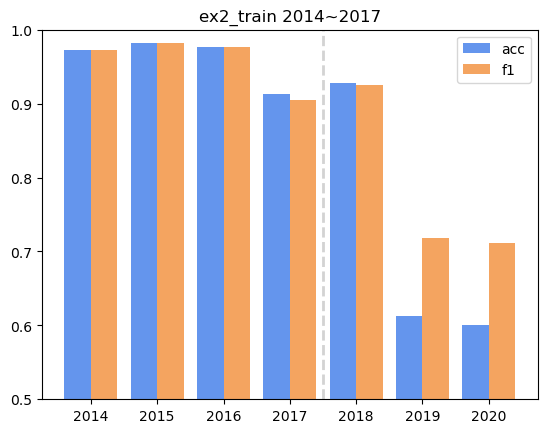

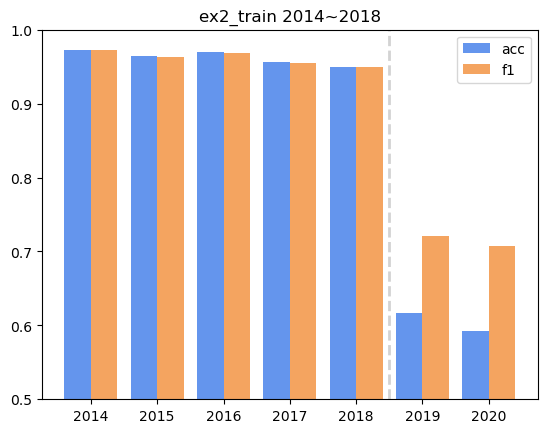

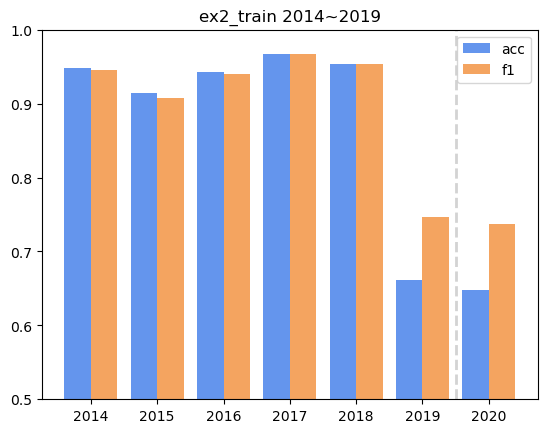

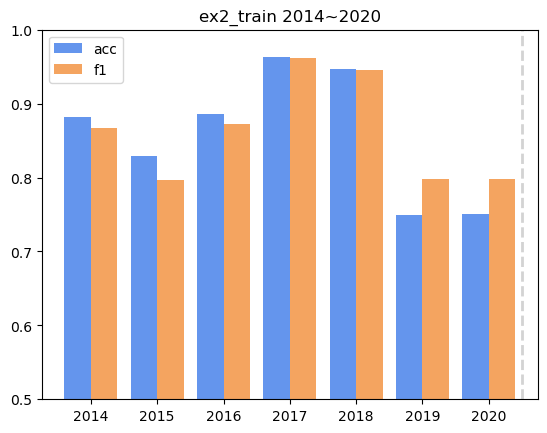

In [25]:
years = range(2014,2021)
x = np.arange(len(years))

for i in range(2014,2021):
    plt.bar(x-0.2 , score_dict[i], label="acc", width=0.4, color='cornflowerblue')
    plt.bar(x+0.2 , f1_dict[i], label="f1", width=0.4, color='sandybrown')
    plt.axvline(i-2013.5, 0, 1, color='lightgray', linestyle='--', linewidth=2)
    if i ==2014:
        plt.title(f'ex2_train 2014')
    else:
        plt.title(f'ex2_train 2014~{i}')
    plt.xticks(x, years)
    plt.ylim(0.5,1)
    plt.legend()
    plt.savefig(f"./visual2/ex2_{i}_acc_f1.png")
    plt.show()

In [26]:
df = pd.concat([
    pd.DataFrame(time_list), 
    pd.DataFrame(size_list)[1], 
    pd.DataFrame([AUT(score_dict[i]) for i in range(2014,2021)]),
    pd.DataFrame([AUT(f1_dict[i]) for i in range(2014,2021)]),
], axis=1)

df.columns=['year','train_time','model_file_size','accuracy','f1 score']
df

,year,train_time,model_file_size,accuracy,f1 score
0,2014,2656.193256,7.86 MB,0.819833,0.833311
1,2015,2870.215893,16.29 MB,0.849125,0.865700
2,2016,2936.114550,22.92 MB,0.863417,0.888783
3,2017,2249.761343,27.52 MB,0.866167,0.891122
4,2018,4301.076651,31.94 MB,0.873417,0.899657
5,2019,2255.065203,35.27 MB,0.873125,0.892756
6,2020,2078.777552,38.39 MB,0.865042,0.867997


In [27]:
df.to_csv('./ex2_result.csv')

In [28]:
print(len(time_list), len(size_list), len(score_dict), len(f1_dict))

7 7 7 7


In [30]:
score_dict[2019]

[0.948, 0.9145, 0.943, 0.9675, 0.954, 0.662, 0.6475]